In [36]:
import pandas as pd
import os
import glob as gb
import matplotlib.pyplot as plt

In [37]:
'''
salesfiles = os.listdir("D:/Sales_Data")
data = pd.DataFrame()
for sfiles in salesfiles:
    fd = pd.read_csv("D:/Sales_Data/" + sfiles)
    data = pd.concat([data,fd])
    #ldata.append(data)
#sframe = pd.concat(ldata, axis=0, ignore_index=True)
data.to_csv("D:/Sales_Data/alldata.csv", index=False)
'''

'\nsalesfiles = os.listdir("D:/Sales_Data")\ndata = pd.DataFrame()\nfor sfiles in salesfiles:\n    fd = pd.read_csv("D:/Sales_Data/" + sfiles)\n    data = pd.concat([data,fd])\n    #ldata.append(data)\n#sframe = pd.concat(ldata, axis=0, ignore_index=True)\ndata.to_csv("D:/Sales_Data/alldata.csv", index=False)\n'

In [38]:
alldata = pd.read_csv("D:/Sales_Data/alldata.csv")
alldata = alldata.dropna(how="any")
alldata = alldata.reset_index(drop=True)
alldata.drop(alldata.index[alldata['Price Each'] == 'Price Each'], inplace = True)
alldata = alldata.reset_index(drop=True)

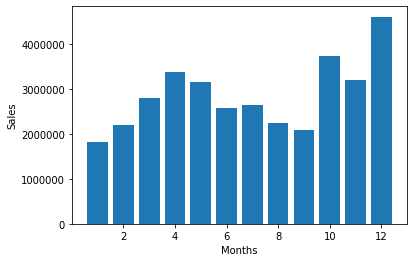

In [39]:
alldata['sales'] = pd.to_numeric(alldata['Quantity Ordered']) * pd.to_numeric(alldata['Price Each'])
alldata['salesmonth'] = alldata['Order Date'].str[0:2]
alldata['salesmonth'] = pd.to_numeric(alldata['salesmonth'])
result = alldata.groupby('salesmonth').sum()
#alldata.iloc[1678:1680]
#alldata.head()
result.head(12)


months = range(1,13)
plt.bar(months,result['sales'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.savefig("D:/Sales_Data/myplot.pdf")
plt.show()

In [ ]:
#City having Maximum sell
#using dataframe same is there for series
#cities = [city for city, data in df.groupby('cities') ]
#chart = pd.DataFrame({'sales': result['sales'] },index=cities)
#chart.plot.pie(y='sales', figsize=(10, 10))
#chart.plot.show()

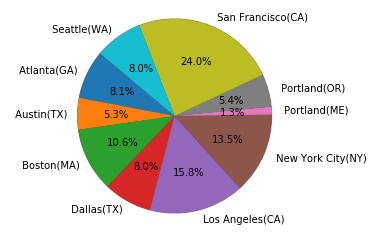

In [40]:
alldata['sales'] = pd.to_numeric(alldata['Price Each']) * pd.to_numeric(alldata['Quantity Ordered'])
#city = df['Purchase Address'].str.split(',', n=-1, expand = True)
#df['cities'] = city[1]+'_'+city[2].str[0:3]
def getcity(x):
    return x.split(',')[1]
def getstate(x):
    return x.split(',')[2].split(' ')[1]

alldata['cities'] = alldata['Purchase Address'].apply(lambda x: f"{getcity(x)}({getstate(x)})")
result=alldata.groupby('cities').sum()
cities = [city for city, data in alldata.groupby('cities') ]

explodes = [0.1]
i=1
while i < len(cities):
    explodes.append(0)
    i+=1
plt.pie(result['sales'], explode = explodes, labels=cities, autopct='%1.1f%%', shadow=True, startangle=140,radius= 1800)
plt.axis('equal')
plt.show()

In [4]:
#When to show the dvertisement to maximize the product sale:

In [42]:
alldata['Order Date'] = pd.to_datetime(alldata['Order Date'])

Text(0, 0.5, 'No of orders')

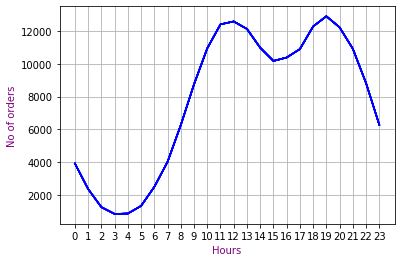

In [43]:
alldata['hour'] = alldata['Order Date'].dt.hour
alldata['minute'] = alldata['Order Date'].dt.minute
hours = [hour for hour, data in alldata.groupby('hour') ]
plt.plot(hours, alldata.groupby('hour').count(),color='blue' )
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours', color='purple')
plt.ylabel('No of orders', color='purple')

In [ ]:
#get the list of products selling together

In [50]:
newdf = alldata[alldata['Order ID'].duplicated(keep=False)]
newdf['grouped'] = newdf.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
newdf = newdf[['Order ID', 'grouped']].drop_duplicates()
newdf.head()

C:\Users\Sujit\anaconda3\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [53]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in newdf['grouped']:
    row_list = row.split(',')
    #count.update(Counter(combinations(row_list,2)))
    count.update(Counter(combinations(row_list,3)))
    
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [68]:
#what product sold the most and the reason

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,salesmonth,cities,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston(MA),22,30
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles(CA),9,27


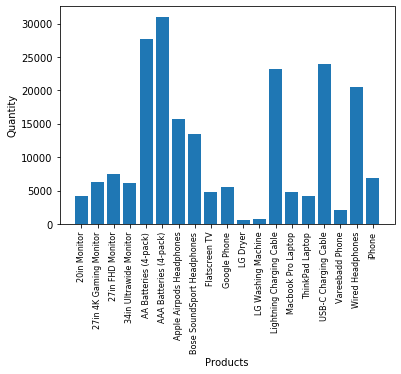

In [87]:
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered'])
quantity = alldata.groupby('Product').sum()
products = [product for product, data in alldata.groupby('Product')]
plt.bar(products, quantity['Quantity Ordered'])
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

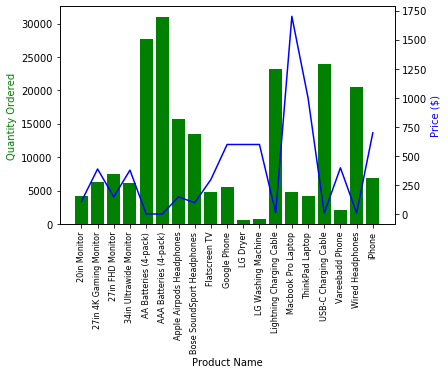

In [104]:
alldata['Price Each'] = pd.to_numeric(alldata['Price Each'])
prices = alldata.groupby('Product').mean()['Price Each']

#plt.xticks(products, rotation='vertical', size = 8)
fig, ax1 =plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity['Quantity Ordered'],color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()